In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [4]:
dataset = pd.read_csv(r'Data/clean_profile_data_all.csv')

In [5]:
dataset.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking
0,316,164,152,106.0,2.90,9,3,northeastern_university,accept,15
1,314,163,151,114.0,3.53,7,3,northeastern_university,accept,15
2,307,160,147,88.0,3.00,36,0,northeastern_university,accept,15
3,330,169,161,113.0,2.40,48,3,northeastern_university,accept,15
4,316,163,153,99.0,2.71,30,0,northeastern_university,accept,15


In [6]:
print(dataset.shape)

(9350, 10)


In [7]:
dataset.columns

Index(['gre_score', 'gre_score_quant', 'gre_score_verbal', 'test_score_toefl',
       'undergraduation_score', 'work_ex', 'papers_published',
       'university_name', 'status', 'ranking'],
      dtype='object')

In [8]:
dataset.describe()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,ranking
count,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000
mean,314.155722,162.828984,151.326738,97.540963,3.029640,16.857540,0.726417,47.039251
std,8.641709,4.840835,5.834517,22.163377,0.488294,16.127621,1.223988,33.960770
min,260.000000,130.000000,130.000000,0.000000,1.060000,0.000000,0.000000,1.000000
25%,308.000000,160.000000,148.000000,95.000000,2.720000,2.000000,0.000000,16.000000
50%,314.000000,163.000000,151.000000,103.000000,3.100000,15.000000,0.000000,35.000000
75%,320.000000,167.000000,155.000000,109.000000,3.400000,27.000000,1.000000,64.000000
max,340.000000,170.000000,170.000000,120.000000,4.000000,153.000000,3.000000,130.000000


In [9]:
datatypes=dataset.dtypes.value_counts()
datatypes_list = datatypes.index.tolist()
datatypesdf=pd.DataFrame()
datatypesdf["datatype"]=datatypes_list
datatypesdf["total"]=[datatypes[0],datatypes[1],datatypes[2]]

  datatype  total
0    int64      6
1   object      2
2  float64      2


<AxesSubplot:title={'center':'Available data types'}, xlabel='datatype'>

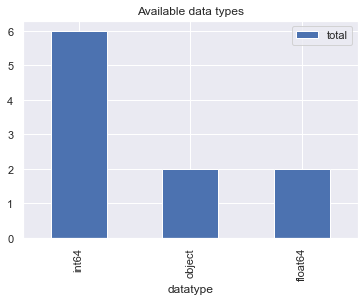

In [10]:
print(datatypesdf)
datatypesdf.plot(x="datatype", kind='bar',title="Available data types")

In [11]:
print(dataset['status'].value_counts())
print('===================================')
print('Percentage of Accept and Reject Values in the dataset')
print(dataset['status'].value_counts(normalize = True))

reject    5003
accept    4347
Name: status, dtype: int64
Percentage of Accept and Reject Values in the dataset
reject    0.53508
accept    0.46492
Name: status, dtype: float64


In [12]:
accept_list = dataset[dataset['status'] == 'accept']
reject_list = dataset[dataset['status'] == 'reject']

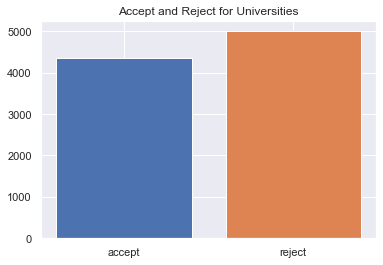

In [13]:
plt.bar('accept',len(accept_list))
plt.bar('reject',len(reject_list))
plt.title('Accept and Reject for Universities')
plt.show()

In [14]:
university_list = dataset['university_name'].unique().tolist()

In [15]:
print(len(university_list),str('universities') + '\n')
print([x for x in university_list])

29 universities

['northeastern_university', 'carnegie_mellon_university', 'clemson_university', 'george_mason_university', 'georgia_institiute_of_technology', 'illinois_institute_of_technology', 'indiana_university_bloomington', 'kansas_state_university', 'university_of_maryland_college_park', 'michigan_technological_university', 'north_carolina_state_university_raleigh', 'new_york_university', 'rochester_institute_of_technology', 'rutgers_university_new_brunswick', 'state_university_of_new_york_at_stony_brook', 'syracuse_university', 'texas_a_m_university_college_station', 'university_of_connecticut', 'university_of_colorado_boulder', 'university_of_california_irvine', 'university_of_florida', 'university_of_north_carolina_at_charlotte', 'university_of_southern_california', 'university_of_texas_arlington', 'university_of_texas_austin', 'university_of_texas_dallas', 'university_of_iowa', 'university_of_cincinnati', 'worcester_polytechnic_institute']


In [16]:
dataset.groupby(by=["university_name"]).mean()["ranking"].sort_values()

university_name
carnegie_mellon_university                       1.0
georgia_institiute_of_technology                 9.0
university_of_maryland_college_park             10.0
northeastern_university                         15.0
university_of_texas_austin                      16.0
university_of_southern_california               19.0
new_york_university                             22.0
university_of_california_irvine                 23.0
rutgers_university_new_brunswick                25.0
university_of_north_carolina_at_charlotte       30.0
texas_a_m_university_college_station            31.0
state_university_of_new_york_at_stony_brook     35.0
indiana_university_bloomington                  48.0
north_carolina_state_university_raleigh         49.0
university_of_texas_dallas                      52.0
university_of_colorado_boulder                  58.0
george_mason_university                         59.0
university_of_florida                           62.0
university_of_texas_arlington 

<AxesSubplot:title={'center':'University_name vs Admit/Reject'}, xlabel='university_name,ranking'>

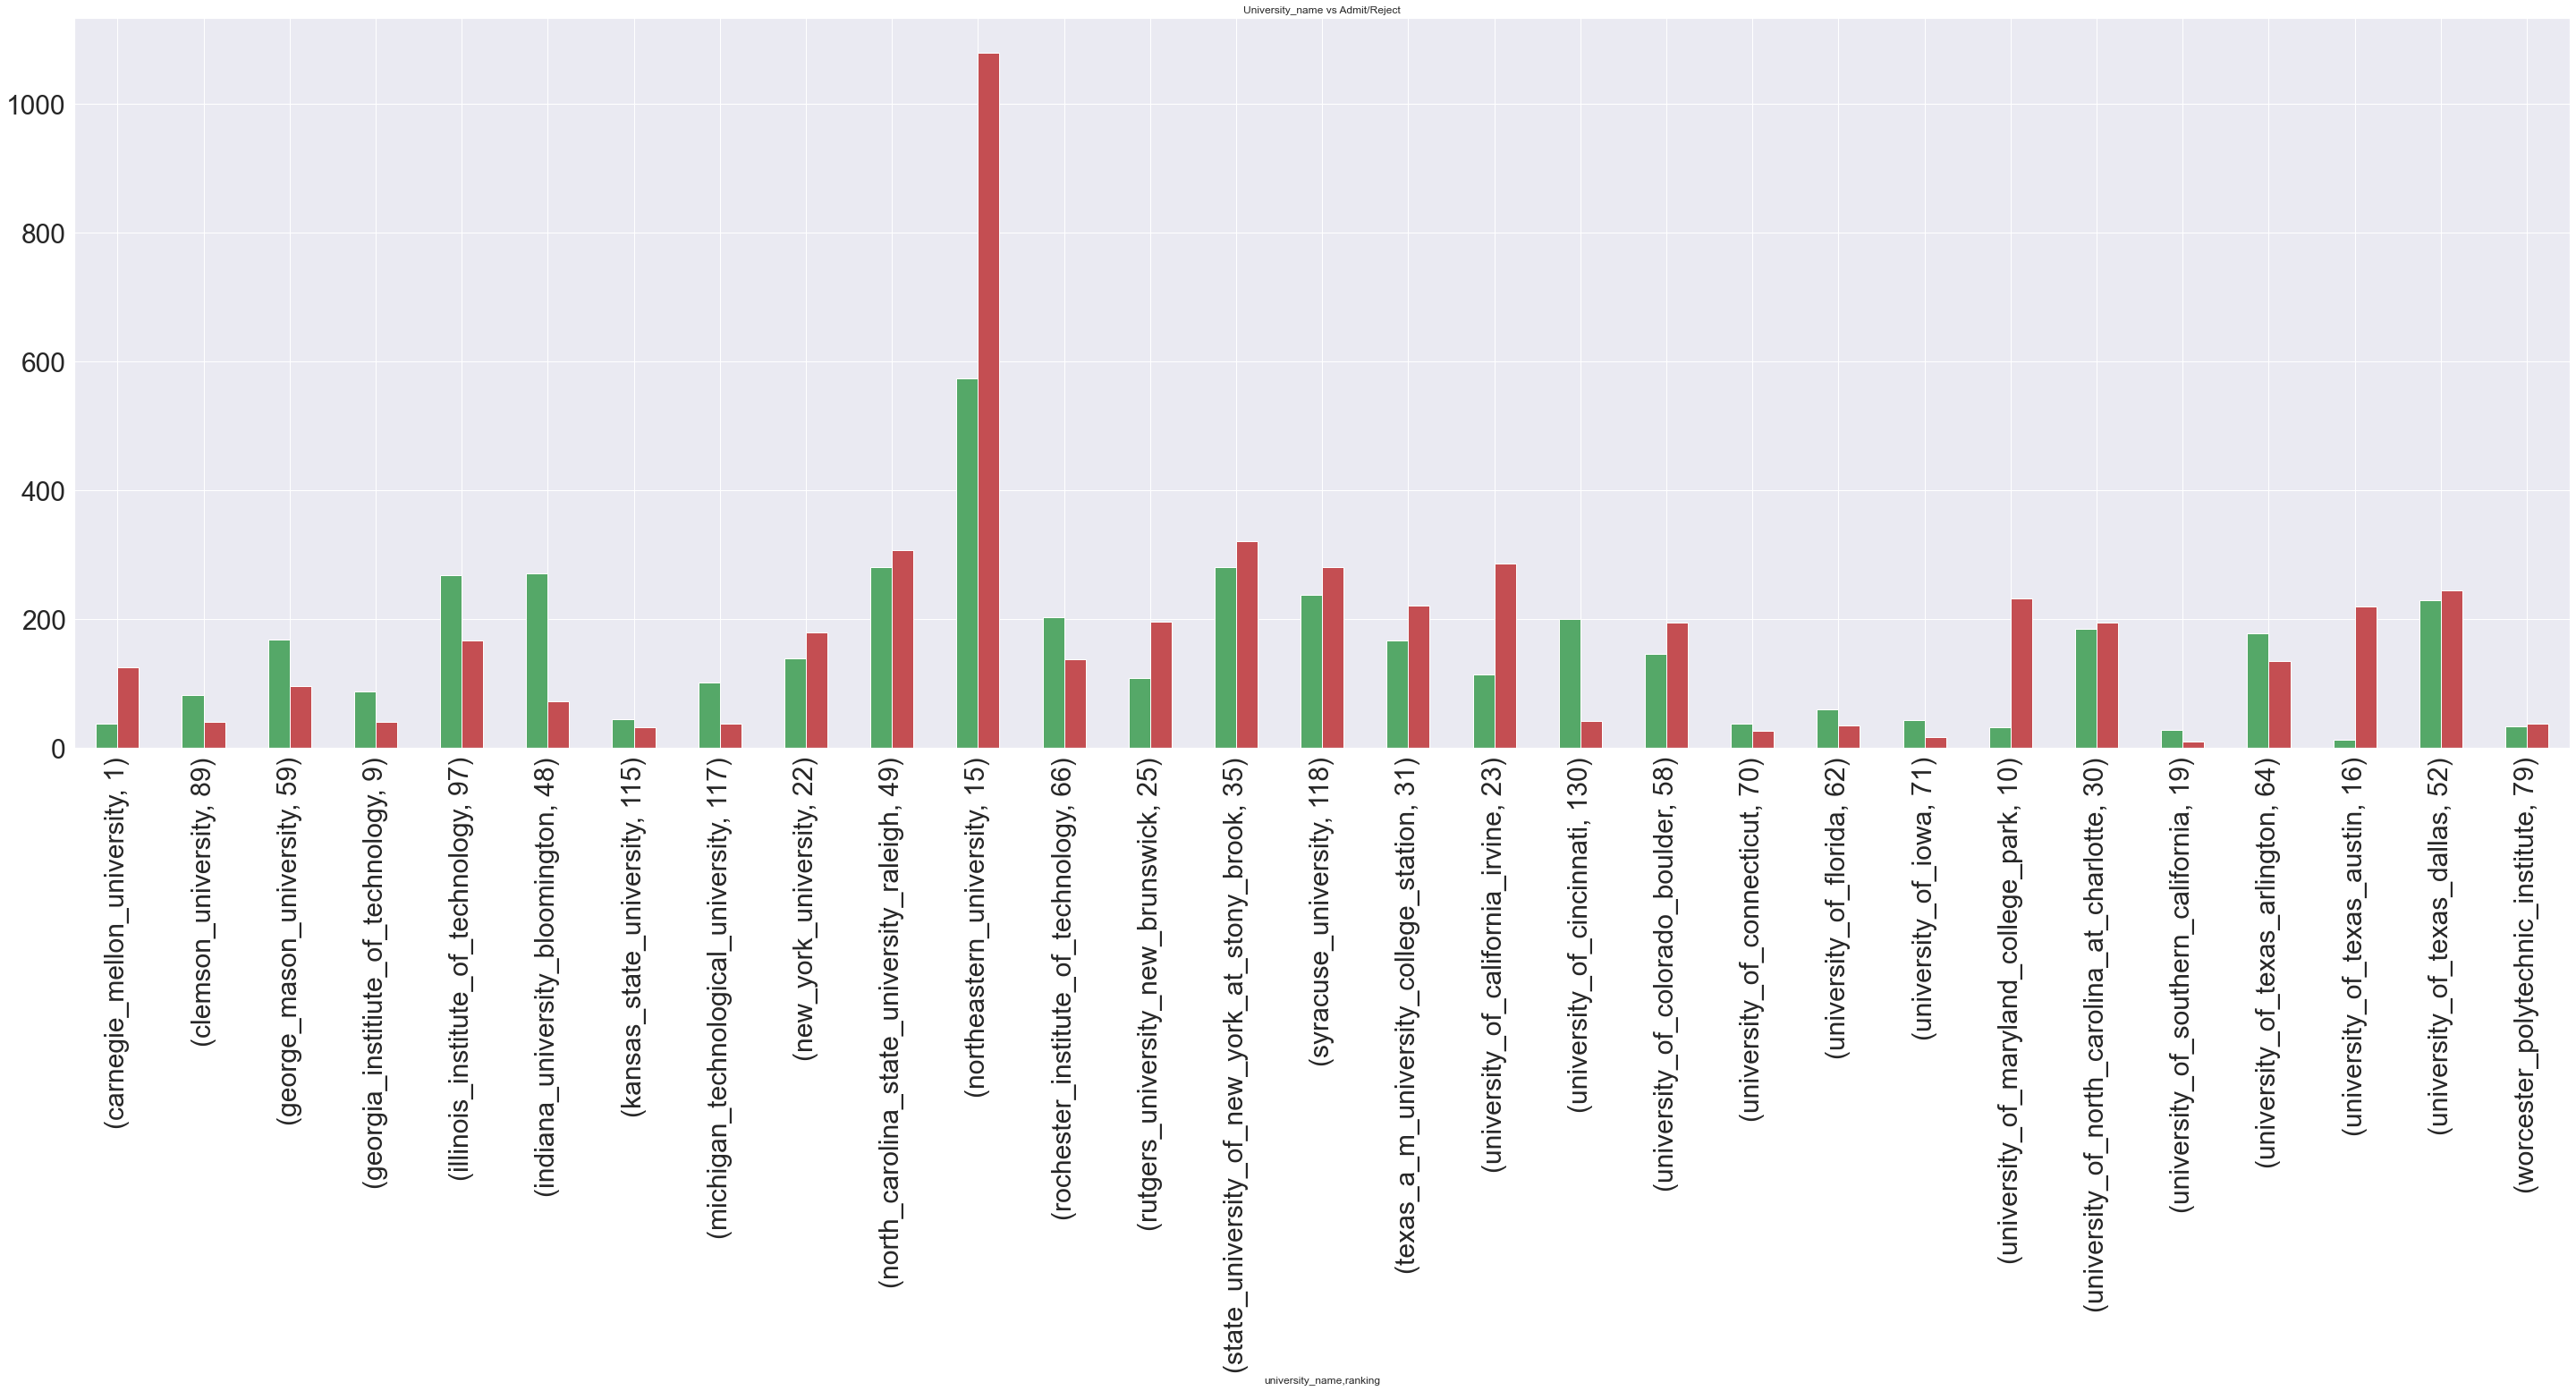

In [17]:
dataset.groupby(['university_name','ranking','status'])['status'].count().unstack().plot(title = 'University_name vs Admit/Reject',fontsize = 30,figsize=(50,15),kind='bar', legend=False, color=['g', 'r'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'northeastern_university'),
  Text(1, 0, 'carnegie_mellon_university'),
  Text(2, 0, 'clemson_university'),
  Text(3, 0, 'george_mason_university'),
  Text(4, 0, 'georgia_institiute_of_technology'),
  Text(5, 0, 'illinois_institute_of_technology'),
  Text(6, 0, 'indiana_university_bloomington'),
  Text(7, 0, 'kansas_state_university'),
  Text(8, 0, 'university_of_maryland_college_park'),
  Text(9, 0, 'michigan_technological_university'),
  Text(10, 0, 'north_carolina_state_university_raleigh'),
  Text(11, 0, 'new_york_university'),
  Text(12, 0, 'rochester_institute_of_technology'),
  Text(13, 0, 'rutgers_university_new_brunswick'),
  Text(14, 0, 'state_university_of_new_york_at_stony_brook'),
  Text(15, 0, 'syracuse_university'),
  Text(16, 0, 'texas_a_m_university_college_station'),
  Text(17, 0, 'university_of_connecticut'),
  Text(18, 0,

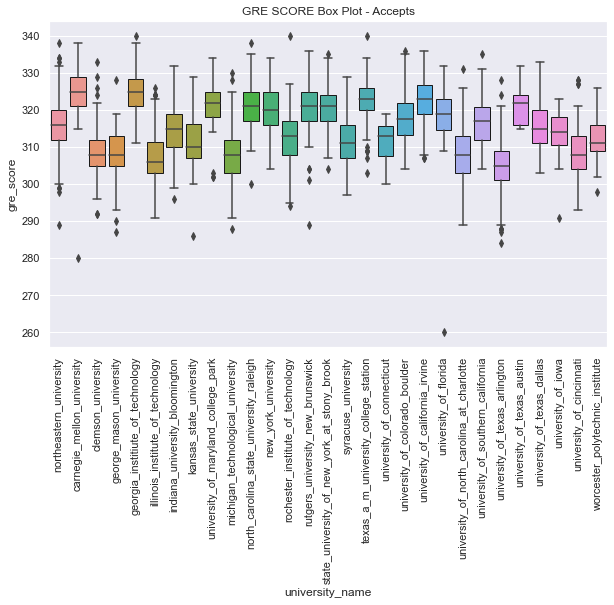

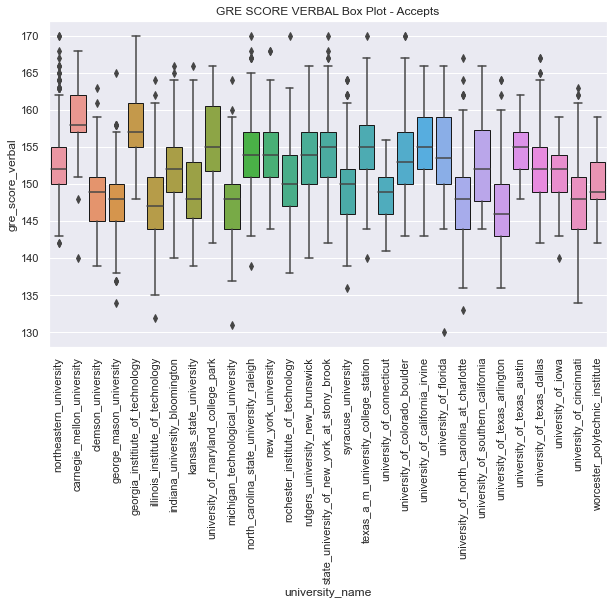

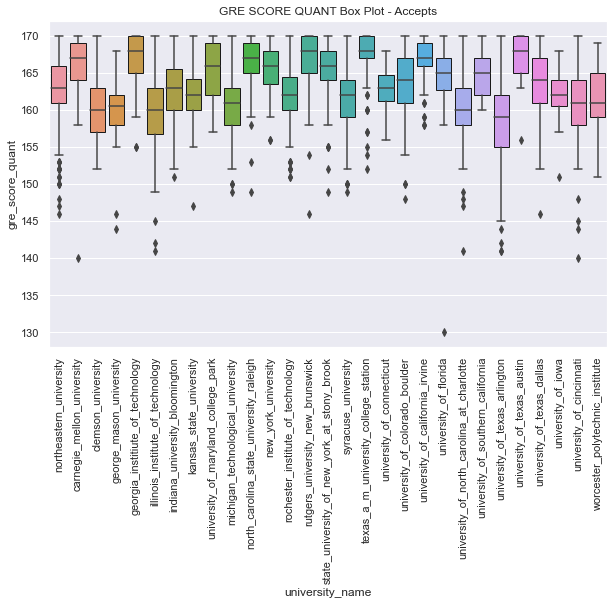

In [18]:
plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE Box Plot - Accepts')
plt.xticks(rotation=90)

plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score_verbal', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE VERBAL Box Plot - Accepts')
plt.xticks(rotation=90)

plt.figure(figsize = (10, 6))
ax =sns.boxplot(x='university_name', y='gre_score_quant', data=dataset[dataset['status']=='accept'])
plt.setp(ax.artists, alpha=1, linewidth=1, edgecolor="k")
plt.title('GRE SCORE QUANT Box Plot - Accepts')
plt.xticks(rotation=90)

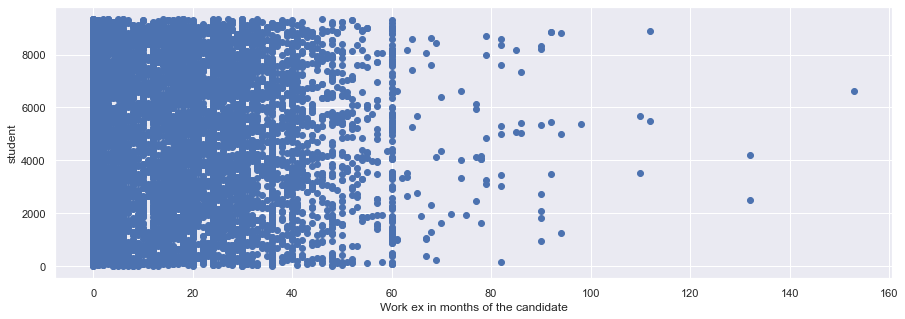

In [20]:
work_ex_list = dataset['work_ex'].tolist()
plt.figure(figsize=(15,5))
plt.xlabel('Work ex in months of the candidate')
plt.ylabel('student')
plt.scatter(work_ex_list, np.arange(0,9350))

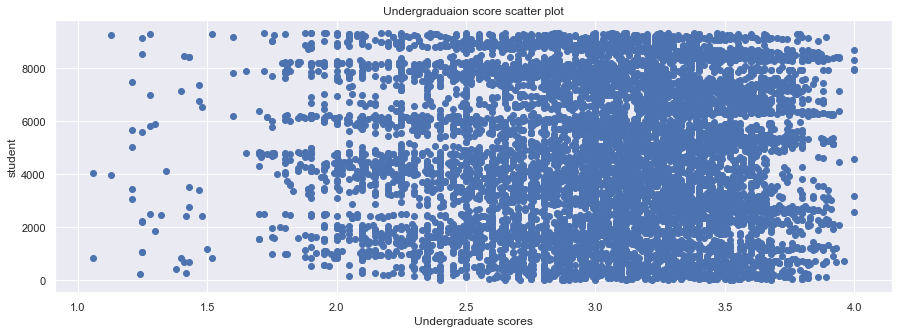

In [21]:
undergraduate_score = dataset['undergraduation_score'].tolist()
plt.figure(figsize=(15,5))
plt.xlabel('Undergraduate scores')
plt.ylabel('student')
plt.title('Undergraduaion score scatter plot')
plt.scatter(undergraduate_score, np.arange(0,9350))

<AxesSubplot:title={'center':'Accept and Reject of universities on the basis on mean TOEFL Score'}, xlabel='university_name'>

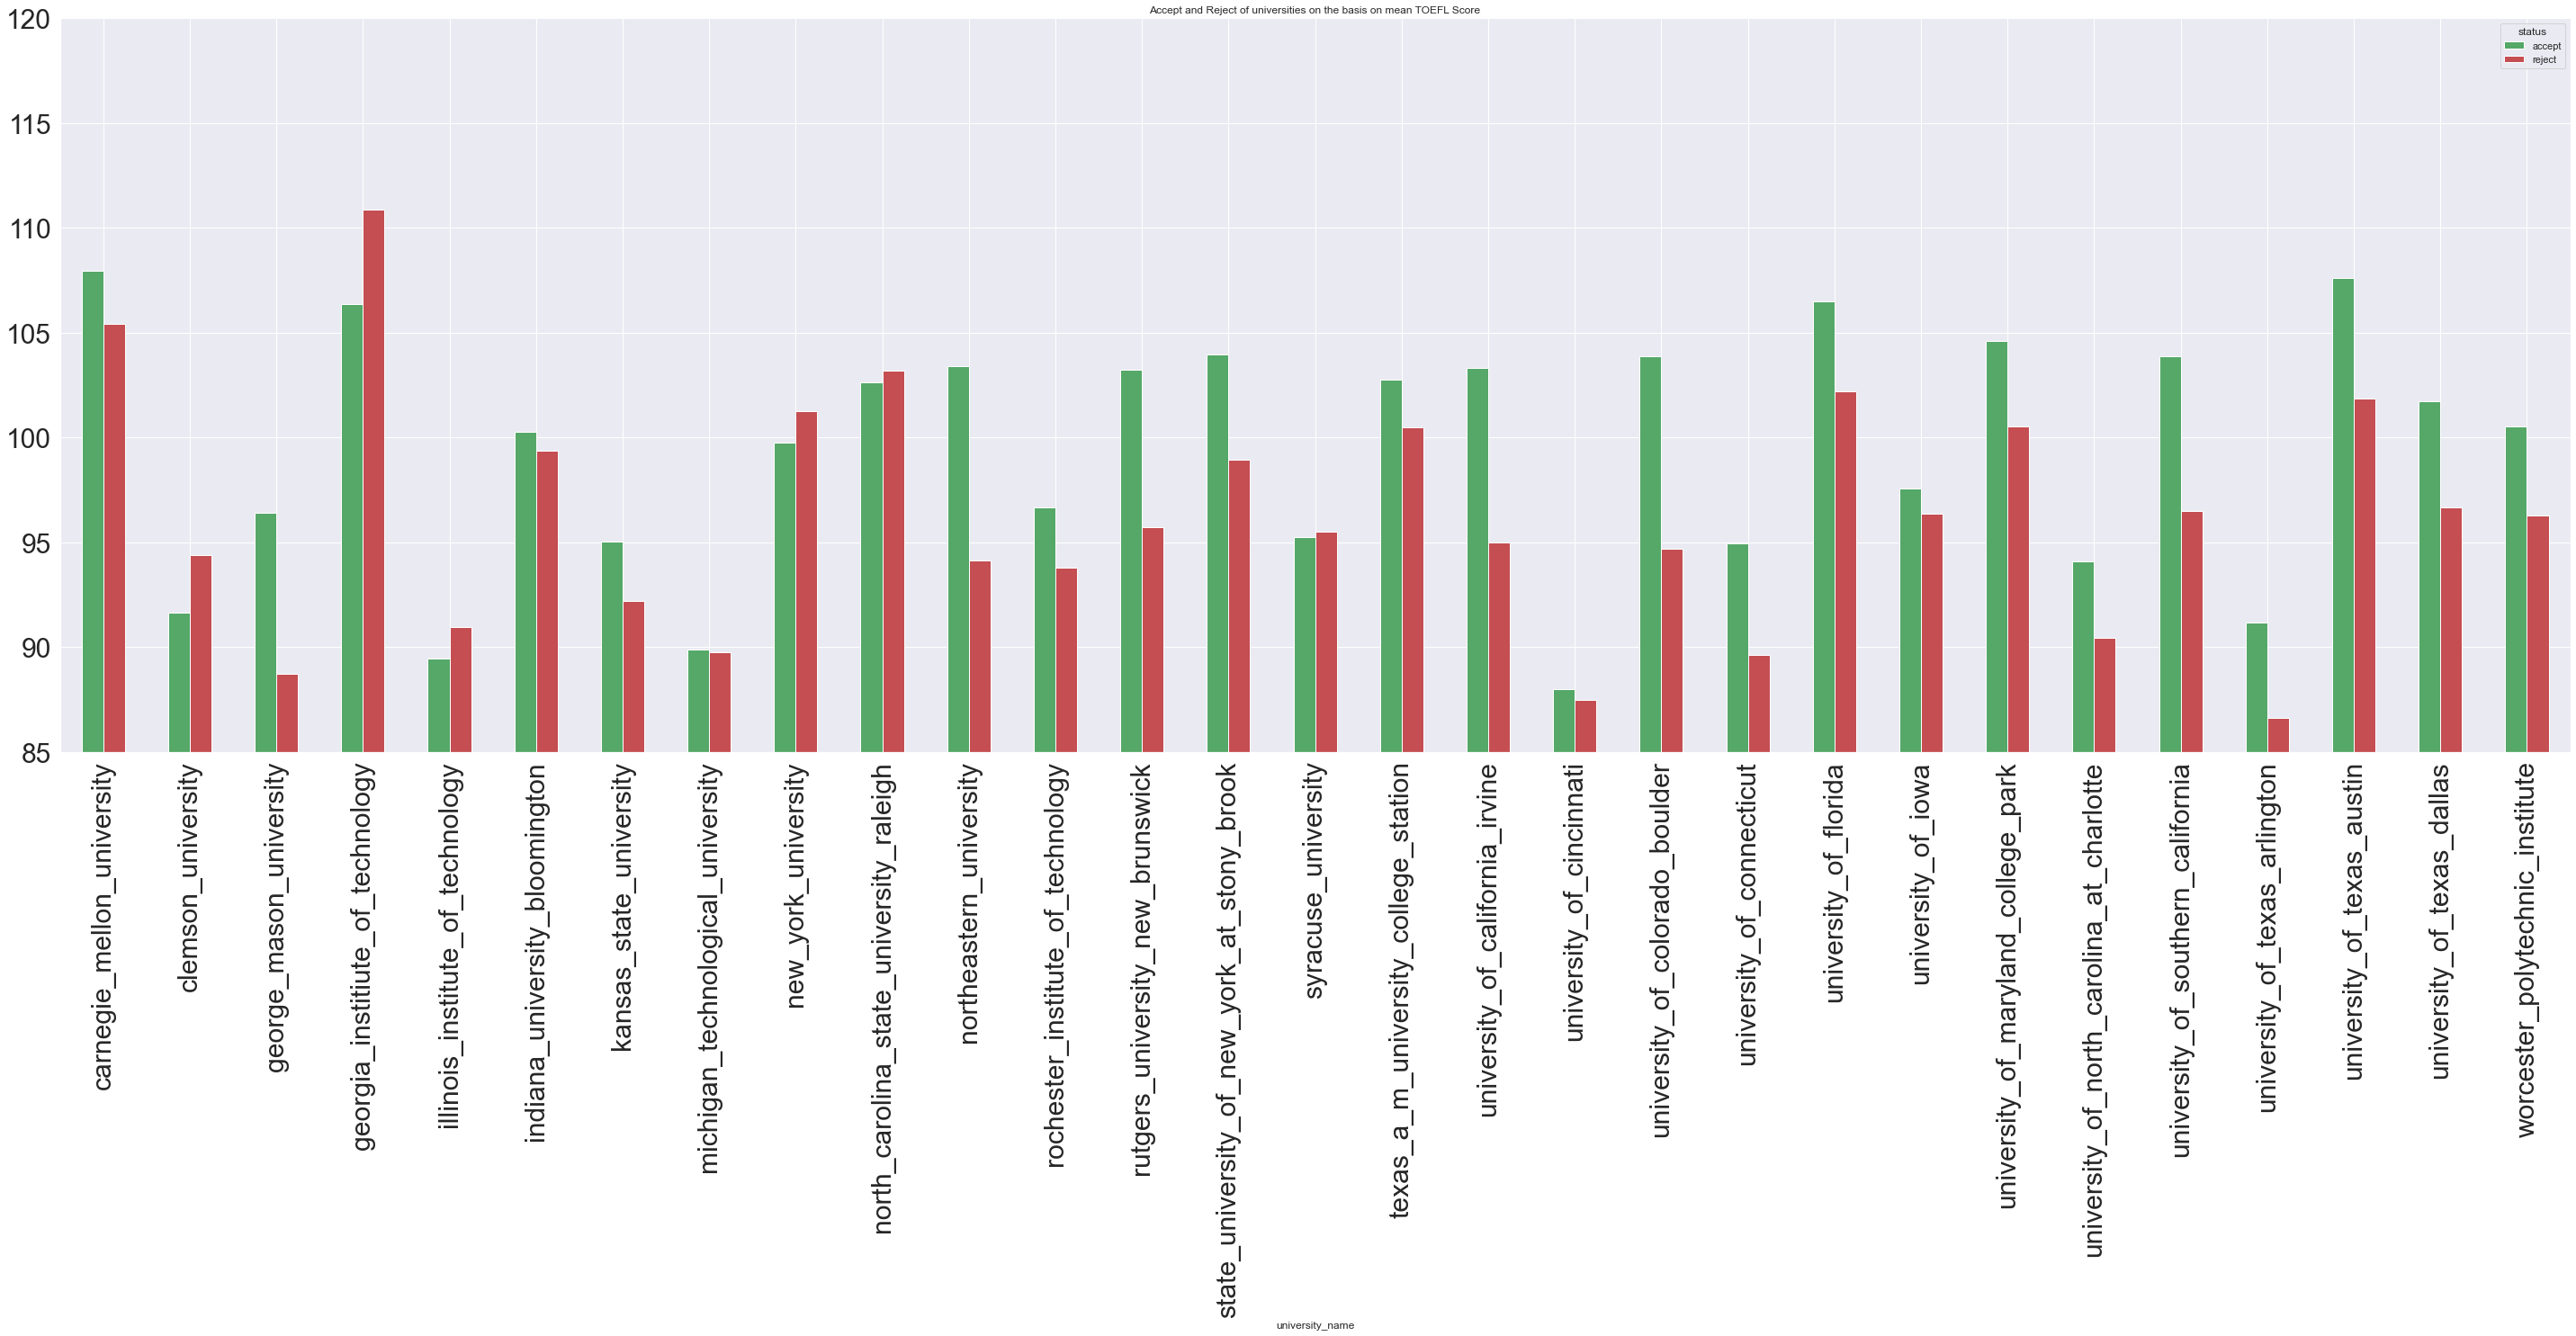

In [22]:
dataset.groupby(['university_name','status'])['test_score_toefl'].mean().unstack().plot(legend=True,ylim = [85,120],title = 'Accept and Reject of universities on the basis on mean TOEFL Score',fontsize = 30,figsize=(50,15),kind='bar', color=['g','r'])

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [24]:
dataset.university_name.value_counts()

northeastern_university                        1653
state_university_of_new_york_at_stony_brook     602
north_carolina_state_university_raleigh         588
syracuse_university                             518
university_of_texas_dallas                      474
illinois_institute_of_technology                435
university_of_california_irvine                 400
texas_a_m_university_college_station            387
university_of_north_carolina_at_charlotte       380
indiana_university_bloomington                  343
rochester_institute_of_technology               341
university_of_colorado_boulder                  341
new_york_university                             318
university_of_texas_arlington                   312
rutgers_university_new_brunswick                304
george_mason_university                         264
university_of_maryland_college_park             264
university_of_cincinnati                        242
university_of_texas_austin                      233
carnegie_mel

In [25]:
target_universities=dataset.university_name.unique().tolist()

In [26]:
from sklearn.utils import resample

In [27]:
resampled_dfs=[]
resampled_df = pd.DataFrame()
for each in target_universities:
    if dataset[(dataset.university_name==each )].shape[0]> 600:
        
        resampled_dfs.append(resample(dataset[(dataset.university_name==each )&(dataset.status=='accept')],replace=True,n_samples=300,random_state=123))
        resampled_dfs.append(resample(dataset[(dataset.university_name==each) &(dataset.status=='reject')],replace=True,n_samples=300,random_state=123))
        
    elif dataset[(dataset.university_name==each )].shape[0] < 200:
        resampled_dfs.append(resample(dataset[(dataset.university_name==each )&(dataset.status=='accept')],replace=True,n_samples=125,random_state=123))
        resampled_dfs.append(resample(dataset[(dataset.university_name==each) &(dataset.status=='reject')],replace=True,n_samples=125,random_state=123))
    else:
        resampled_dfs.append(dataset[(dataset.university_name==each )&(dataset.status=='accept')])
        resampled_dfs.append(dataset[(dataset.university_name==each )&(dataset.status=='reject')])
        

resampled_df = pd.concat( [ f for f in resampled_dfs ] )
    

In [28]:
resampled_df.groupby(by='university_name')['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    125
                                             reject    125
clemson_university                           accept    125
                                             reject    125
george_mason_university                      accept    168
                                             reject     96
georgia_institiute_of_technology             accept    125
                                             reject    125
illinois_institute_of_technology             accept    268
                                             reject    167
indiana_university_bloomington               accept    271
                                             reject     72
kansas_state_university                      accept    125
                                             reject    125
michigan_technological_university            accept    125
                                             reject    125
new_

In [29]:
dataset =resampled_df.copy()

In [30]:
#train test split for modelling
training, testing = train_test_split(dataset, test_size=0.25, random_state=5, stratify=dataset[['university_name', 'status']])

In [31]:
testing.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    31
                                             reject    31
clemson_university                           accept    31
                                             reject    31
george_mason_university                      accept    42
                                             reject    24
georgia_institiute_of_technology             accept    31
                                             reject    31
illinois_institute_of_technology             accept    67
                                             reject    42
indiana_university_bloomington               accept    68
                                             reject    18
kansas_state_university                      accept    31
                                             reject    31
michigan_technological_university            accept    31
                                             reject    31
new_york_university 

In [32]:
model_name=[]
model_train_acc=[]
model_test_accuracy=[]
model_train_f1=[]
model_test_f1=[]

In [33]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [34]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    prob_test=pd.DataFrame(model.predict_proba(X_test))
    prob_train=pd.DataFrame(model.predict_proba(X_train))
    test_f1_score = f1_score(Y_test, y_pred,pos_label='accept')
    train_f1_score = f1_score(Y_train, y_train_pred,pos_label='accept')
    train_accuracy=accuracy_score(Y_train, y_train_pred)
    test_accuracy=accuracy_score(Y_test, y_pred)
    test_cm = confusion_matrix(Y_test, y_pred,labels=['accept','reject'])
    train_cm = confusion_matrix(Y_train, y_train_pred,labels=['accept','reject'])
    model_name.append(model)
    model_train_acc.append(train_accuracy)
    model_test_accuracy.append(test_accuracy)
    model_test_f1.append(test_f1_score)
    model_train_f1.append(train_f1_score)
    return [train_cm,test_cm,train_accuracy,test_accuracy,train_f1_score, test_f1_score, prob_train,prob_test, y_pred,y_train_pred, model,sc]

In [35]:
#test and train roc
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

def generate_cm_roc(model_results):
    test_fpr,test_tpr,test_thresholds = metrics.roc_curve(testing['status'], model_results[7][0],pos_label='accept')
    test_roc_auc = auc(test_fpr, test_tpr)
    train_fpr,train_tpr,train_thresholds = metrics.roc_curve(training['status'], model_results[6][0],pos_label='accept')
    train_roc_auc = auc(train_fpr, train_tpr)
    plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
                 label='Train ROC (auc= %0.2f)' % (train_roc_auc))
    plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
                 label='Test ROC (auc= %0.2f)' % (test_roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[0], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Train Confusion Matrix')
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[1], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Test confusion matrix')
    plt.show()

In [36]:
numerical_data = training.select_dtypes(include = ['int64','float','uint8'])
categorical_data = training.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
numerical_features

array(['gre_score', 'gre_score_quant', 'gre_score_verbal',
       'test_score_toefl', 'undergraduation_score', 'work_ex',
       'papers_published', 'ranking'], dtype=object)

In [37]:
from sklearn.svm import SVC
svc_model=SVC(gamma='auto',probability=True)

svc_model_results=get_result(svc_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

In [38]:
print('test_accuracy:',svc_model_results[3])
print('train_accuracy:',svc_model_results[2])
print('test_f1_score:',svc_model_results[5])
print('train_f1_score:',svc_model_results[4])

test_accuracy: 0.6395774075579033
train_accuracy: 0.6655830963023162
test_f1_score: 0.59180855959503
train_f1_score: 0.6219568213137344


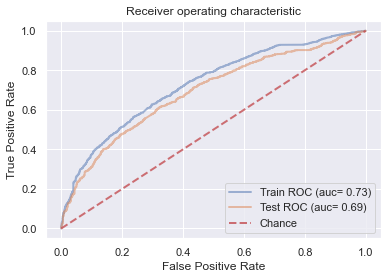

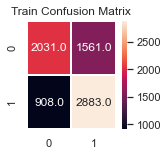

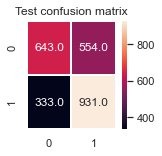

In [39]:
generate_cm_roc(svc_model_results)

In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

decision_tree_model_results=get_result(decision_tree_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

In [41]:
print('test_accuracy:',decision_tree_model_results[3])
print('train_accuracy:',decision_tree_model_results[2])
print('test_f1_score:',decision_tree_model_results[5])
print('train_f1_score:',decision_tree_model_results[4])

test_accuracy: 0.7553839902478667
train_accuracy: 1.0
test_f1_score: 0.7457770270270271
train_f1_score: 1.0


In [42]:
decision_tree_model_results[10].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=10)

random_forest_model_results=get_result(random_forest_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',random_forest_model_results[3])
print('train_accuracy:',random_forest_model_results[2])
print('test_f1_score:',random_forest_model_results[5])
print('train_f1_score:',random_forest_model_results[4])

test_accuracy: 0.7614790735473385
train_accuracy: 0.989570635243126
test_f1_score: 0.7614790735473385
train_f1_score: 0.9893484576013281


In [44]:
from sklearn.naive_bayes import GaussianNB
navie_bayes_model = GaussianNB()
navie_bayes_model_results=get_result(navie_bayes_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',navie_bayes_model_results[3])
print('train_accuracy:',navie_bayes_model_results[2])
print('test_f1_score:',navie_bayes_model_results[5])
print('train_f1_score:',navie_bayes_model_results[4])


test_accuracy: 0.5615603413246648
train_accuracy: 0.5801164838141677
test_f1_score: 0.5993316004455997
train_f1_score: 0.6118206862008515


In [50]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(training['status'])
y_test = lb.fit_transform(testing['status'])

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense# Neural network
model_ann = Sequential()
model_ann.add(Dense(16, input_dim=8, activation='relu'))
model_ann.add(Dense(12, activation='relu'))
model_ann.add(Dense(1, activation='softmax'))
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_ann.fit(training[numerical_features], y_train, epochs=200, batch_size=64)

Epoch 1/200
7383/7383 [==============================] - 1s 81us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 2/200
7383/7383 [==============================] - 0s 40us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 3/200
7383/7383 [==============================] - 0s 37us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 4/200
7383/7383 [==============================] - 0s 41us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 5/200
7383/7383 [==============================] - 0s 40us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 6/200
7383/7383 [==============================] - 0s 42us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 7/200
7383/7383 [==============================] - 0s 41us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 8/200
7383/7383 [==============================] - 0s 41us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 9/200
7383/7383 [==============================] - 0s 41us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 10/200
7383/7383 [==============================] - 0s 47u

7383/7383 [==============================] - 0s 42us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 155/200
7383/7383 [==============================] - 0s 51us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 156/200
7383/7383 [==============================] - 0s 47us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 157/200
7383/7383 [==============================] - 0s 46us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 158/200
7383/7383 [==============================] - 0s 46us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 159/200
7383/7383 [==============================] - 0s 37us/step - loss: 7.4600 - accuracy: 0.5135 0s - loss: 7.8606 - accura
Epoch 160/200
7383/7383 [==============================] - 0s 37us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 161/200
7383/7383 [==============================] - 0s 38us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 162/200
7383/7383 [==============================] - 0s 39us/step - loss: 7.4600 - accuracy: 0.5135
Epoch 163/200
7383/7383 [========

In [52]:
model_ann.evaluate(testing[numerical_features],y_test)

2461/2461 [==============================] - 0s 54us/step


[7.457897837691944, 0.5136123299598694]